In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
df=pd.read_excel("Merged_Dataset.xlsx")
df

,Unnamed: 0,Postal Abbr.,State,Year,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Disposable personal income,Gross domestic product (GDP),...,Total violent robbery,No. of persons 25 and over (in thou) Total,No. of persons 25 and over (in thou) Male,No. of persons 25 and over (in thou) Female,Percentage with high school completion or higher (%) total,Percentage with high school completion or higher (%) Male,Percentage with high school completion or higher (%) Female,Percentage with bachelor's or higher degree (%) total,Percentage with bachelor's or higher degree (%) Male,Percentage with bachelor's or higher degree (%) Female
0,0,AL,Alabama,2013,2172102,2012828,159274,7.3,159063.1,194786.9,...,4648,3226,1525,1701,84.9,84.0,85.7,23.5,23.4,23.5
1,1,AL,Alabama,2014,2164715,2018705,146010,6.7,164562.8,197406.9,...,4701,3259,1536,1723,84.6,83.7,85.5,23.0,22.7,23.3
2,2,AL,Alabama,2015,2152295,2020443,131852,6.1,171157.0,202372.4,...,4611,3283,1550,1733,85.1,84.1,86.1,24.0,23.7,24.3
3,3,AL,Alabama,2016,2155729,2029157,126572,5.9,173653.1,207368.4,...,4686,3300,1558,1742,84.9,83.3,86.3,24.7,24.5,24.9
4,4,AL,Alabama,2017,2203458,2103873,99585,4.5,180348.3,214606.3,...,4217,3314,1569,1745,86.0,85.0,86.9,25.6,24.7,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,WY,Wyoming,2015,301608,288894,12714,4.2,30239.2,38426.9,...,59,388,191,197,93.2,93.2,93.1,26.9,26.6,27.1
353,353,WY,Wyoming,2016,300546,284439,16107,5.4,28807.8,35879.0,...,59,391,199,192,93.2,93.0,93.5,26.5,25.5,27.6
354,354,WY,Wyoming,2017,293802,281164,12638,4.3,29625.5,36980.7,...,76,389,198,190,93.1,92.7,93.4,27.6,25.9,29.3
355,355,WY,Wyoming,2018,292629,280754,11875,4.1,31548.4,39171.7,...,100,394,200,194,92.7,92.5,93.0,27.0,25.6,28.4


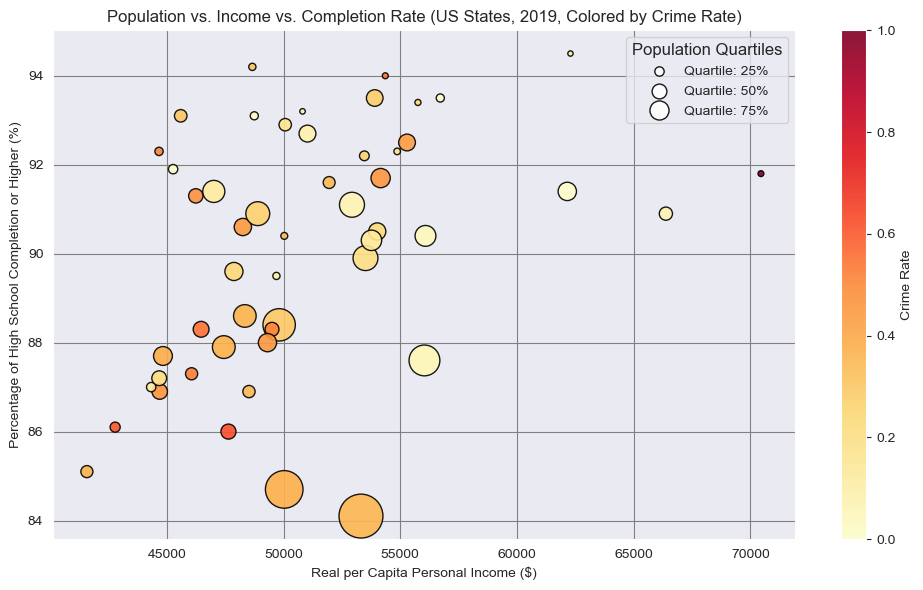

In [27]:
#Filter dataset for year 2019, and extract needed columns
df_2019 = df[df['Year'] == 2019]
state = df_2019['State']
pop = df_2019['Population']
crime_rate = df_2019['Rates of all crimes']
income = df_2019['Real per capita personal income']  
completion_rate = df_2019['Percentage with high school completion or higher (%)  total']

# Normalize the data for bubble sizes
max_pop = max(pop)
scaled_pop = [1000 * (p / max_pop) for p in pop]  # Adjust the scaling factor (1000) 

# Normalize the crime rates between 0 and 1
crime_rate_min = min(crime_rate)
crime_rate_max = max(crime_rate)
normalized_crime_rates = [(c - crime_rate_min) / (crime_rate_max - crime_rate_min) for c in crime_rate]

# Create a colormap
cmap = 'YlOrRd'

# Create a Normalize object to map normalized crime rates to colors in the colormap
normalize = Normalize(vmin=0, vmax=1)

# Create a scatter plot with bubble sizes and shading
plt.figure(figsize=(10, 6))
scatter = plt.scatter(income, completion_rate, s=scaled_pop, c=normalized_crime_rates,
                      cmap=cmap, alpha=0.9, edgecolors='k')
sns.set_style("dark")
ax = plt.gca()
ax.grid(color='grey', axis='y')
ax.grid(color='grey', axis='x')
# Calculate quartiles for the population data
quartiles = np.percentile(pop, [25, 50, 75])  # Calculate 1st, 2nd (median), and 3rd quartiles

# Define a single custom color for the legend markers (all red)
legend_colors = ['white', 'white', 'white']  # Red color for all legend markers

# Create proxy artists for the legend with custom sizes and labels
legend_elements = []
for size, color, label in zip(quartiles, legend_colors, ['25%', '50%', '75%']):
    scaled_size = 1000 * (size / max_pop)  # Scale the size for the legend
    legend_elements.append(plt.scatter([], [], s=scaled_size, label=f'Quartile: {label}', 
                                       c=color, edgecolors='k', alpha=0.9))

# Add the legend
legend = plt.legend(handles=legend_elements, loc='upper right', title='Population Quartiles')
plt.setp(legend.get_title(), fontsize='12')  # Set the font size of the legend title

# Add labels and a color bar
plt.xlabel('Real per Capita Personal Income ($)')
plt.ylabel('Percentage of High School Completion or Higher (%)')
plt.title('Population vs. Income vs. Completion Rate (US States, 2019, Colored by Crime Rate)')

# Add a color bar using the Normalize object
plt.colorbar(scatter, label='Crime Rate', norm=normalize)
plt.grid(True)
plt.tight_layout()
plt.show()